## Afwa Afini | PYTN-KS20-018

### Introduction
Task 2 implements an understanding of both descriptive and inferential statistics in Python. The data to be used is the NYC Property Sales Dataset taken from Kaggle. This dataset is a record of every building or unit sold in the New York City property market over a 12-month period.

### Importing libraries

In [75]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import mannwhitneyu

### Data Preprocessing & EDA

In [2]:
# load data source
df = pd.read_csv('../dataset/nyc-rolling-sales.csv')

In [43]:
# understanding the dataframe
print('dataframe shape : ', df.shape)
print('check the missing values : ', df.isna().values.any())

dataframe shape :  (84548, 22)
check the missing values :  False


In [ ]:
# removed irrelavant columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [60]:
# change datatype of 'SALE DATE'
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

# change datatype of 'SALE PRICE'
df['SALE PRICE'].replace(' -  ', 0, inplace=True)
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE']).astype('int64')

# change datatype of 'GROSS SQUARE FEET'
df['GROSS SQUARE FEET'].replace(' -  ', 0, inplace=True)
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET']).astype('int64')
df['GROSS SQUARE FEET'].dtype

# change datatype of 'LAND SQUARE FEET'
df['LAND SQUARE FEET'].replace(' -  ', 0, inplace=True)
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET']).astype('int64')
df['LAND SQUARE FEET'].dtype

dtype('int64')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  int64         
 11  RE

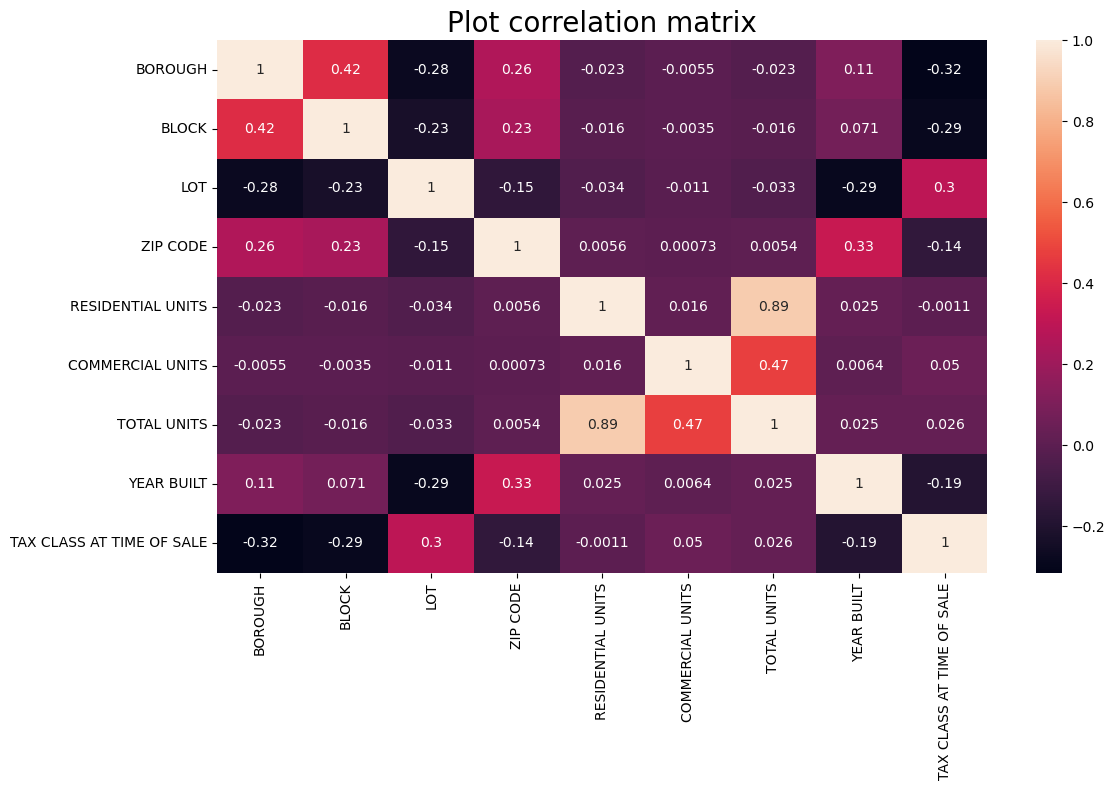

In [55]:
# View the correlation
kolom_numerik = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
korelasi = kolom_numerik.corr()

plt.figure(figsize=(12,8))
sns.heatmap(korelasi, annot=True)
plt.title('Plot correlation matrix', size=20)
plt.tight_layout()
plt.show()

## **Measure of Central Tendency**
- Mean
- Median
- Mode

### **Mean** 
Mean is the average or estimate of a particular value that represents all the data.

In [64]:
mean_salePrice = statistics.mean(df['SALE PRICE'])
print('Mean of Sale Price = ', mean_salePrice)

mean_LandSquareFeet = statistics.mean(df['LAND SQUARE FEET'])
print('Mean of Land Square Feet = ', mean_LandSquareFeet)

mean_GrossSquareFeet = statistics.mean(df['GROSS SQUARE FEET'])
print('Mean of Gross Square Feet = ', mean_GrossSquareFeet)

Mean of Sale Price =  1056622.9941453375
Mean of Land Square Feet =  2717.7926266736054
Mean of Gross Square Feet =  2724.4452973458865


### **Median** 
Median is defined as the middle measure (data) after sorting.

In [65]:
median_salePrice = statistics.median(df['SALE PRICE'])
print('Median of Sale Price : ', median_salePrice)

median_LandSquareFeet = statistics.median(df['LAND SQUARE FEET'])
print('Median of Land Square Feet = ', median_LandSquareFeet)

median_GrossSquareFeet = statistics.median(df['GROSS SQUARE FEET'])
print('Median of Gross Square Feet = ', median_GrossSquareFeet)

Median of Sale Price :  415000.0
Median of Land Square Feet =  1770.0
Median of Gross Square Feet =  1076.0


### **Mode**
Mode is the value with the most frequency.

In [68]:
# dictionaries for mapping codes to borough names
borough_map = {1: 'Manhattan',
               2: 'Bronx',
               3: 'Brooklyn',
               4: 'Queens',
               5: 'Staten Island'}

# calculate the mode
borough_mode = df['BOROUGH'].mode().iloc[0]

# change the mode value to borough name
see_borough_mode = borough_map[borough_mode]
print('Mode of Borough : ', see_borough_mode)

# calculate the mode in the neighborhood
neighborhood_mode = df['NEIGHBORHOOD'].mode().iloc[0]
print('Mode of Neighborhood : ', neighborhood_mode)

# calculate the mode in the building class category
category_mode = df['BUILDING CLASS CATEGORY'].mode().iloc[0]
print('Mode of Building Class Category : ', category_mode)

Mode of Borough :  Queens
Mode of Neighborhood :  FLUSHING-NORTH
Mode of Building Class Category :  01 ONE FAMILY DWELLINGS                    


## **Measure of Spread**
- Range
- Variance
- Standard Deviation

### **Range**
In statistics, "range" refers to the difference between the highest (maximum) value and the lowest (minimum) value in a data set. Range is used to give an idea of the spread of data in a distribution or data set.

In [69]:
range_block = np.ptp(df['BLOCK'])
range_lot = np.ptp(df['LOT'])
range_zip_code = np.ptp(df['ZIP CODE'])
range_residential_units = np.ptp(df['RESIDENTIAL UNITS'])
range_commercial_units = np.ptp(df['COMMERCIAL UNITS'])
range_total_units = np.ptp(df['TOTAL UNITS'])
range_sale_price = np.ptp(df['SALE PRICE'])

print('Range of Block : ', range_block)
print('Range of LOT : ', range_lot)
print('Range of Zip Code : ', range_zip_code)
print('Range of Residence Units : ', range_residential_units)
print('Range of Commercial Units : ', range_commercial_units)
print('Range of Total Units : ', range_total_units)
print('Range of Sale Price : ', range_sale_price)

Range of Block :  16321
Range of LOT :  9105
Range of Zip Code :  11694
Range of Residence Units :  1844
Range of Commercial Units :  2261
Range of Total Units :  2261
Range of Sale Price :  2210000000


### **Variance**
In statistics, "variance" is a statistical measure used to quantify the spread or variation of data within a distribution or data set. Variance gives an idea of how far the data is spread out from the mean or center value.

In [71]:
var_salePrice = df['SALE PRICE'].var(ddof=1)
print('Variance of Sale Price : ', var_salePrice)

Variance of Sale Price :  107909296048288.34


### **Standard Deviation**
In statistics, "standard deviation" is a measure used to quantify the spread or dispersion of data in a distribution or data set. Standard deviation measures how far each data point is from the mean or center value of the distribution.

In [72]:
std_salePrice = df['SALE PRICE'].std(ddof=1)
print('Standard Deviation of Sale Price : ', std_salePrice)

Standard Deviation of Sale Price :  10387939.93283983


## **Probability Distribution**

**RESEARCH QUESTION**<br>
>    Is there a difference in units sold between properties built in 1900-1958 and 1959-2017?<br><br>

**HYPOTHESIS FORMULATION**<br>
>   H0: There is no difference in the number of units sold between the two property groups.<br>
>   H1: There is a difference in the number of units sold between the two property groups<br><br>

### **Data Collect**
**Group 1** is a group of properties built in 1959-2017.

In [20]:
# Group 1: Year Built in 1968-2017
filtered_category1 = df[(df['YEAR BUILT'] >= 1959) & (df['YEAR BUILT'] <= 2017)]
year_built_cat1 = filtered_category1['YEAR BUILT'].value_counts().sort_index() # Pandas Series

year_built_cat1.shape

(59,)

In [42]:
# view summary statistic of Group 1
print('Descriptive Statistic of Group 1')
print('================================')
print('Mean : ', year_built_cat1.mean())
print('Median :', year_built_cat1.median())
print('Minimum :', year_built_cat1.min())
print('Maximum :', year_built_cat1.max())
print('Standard Deviation :', year_built_cat1.std())

Descriptive Statistic of Group 1
Mean :  489.1694915254237
Median : 302.0
Minimum : 6
Maximum : 2654
Standard Deviation : 464.2496412470481


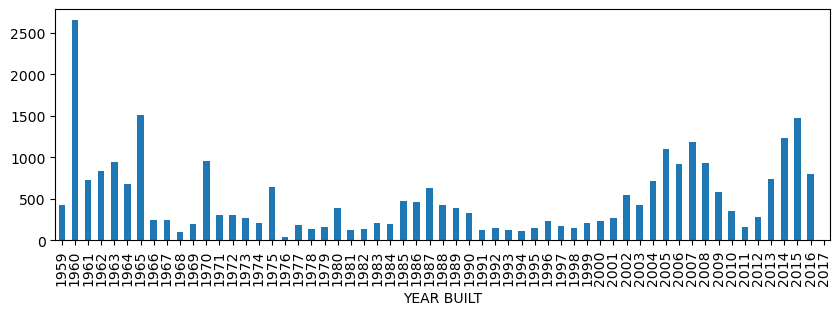

In [21]:
# visualize Group 1
plt.figure(figsize=(10,3))
year_built_cat1.plot(kind='bar')
plt.show()

In [77]:
# normality test data Group 1 use the Shapiro test
array_group1 = np.array(year_built_cat1)

stat, p = shapiro(array_group1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.781, p=0.000
Probably not Gaussian


**Group 2** is a group of properties built between 1900-1958.

In [24]:
# Group 2: Year Built in 1918-1967
filtered_category2 = df[(df['YEAR BUILT'] >= 1900) & (df['YEAR BUILT'] <= 1958)]
year_built_cat2 = filtered_category2['YEAR BUILT'].value_counts().sort_index() # Pandas Series

year_built_cat2.shape

(59,)

In [41]:
# view summary statistic of Group 2
print('Descriptive Statistic of Group 2')
print('================================')
print('Mean : ', year_built_cat2.mean())
print('Median :', year_built_cat2.median())
print('Minimum :', year_built_cat2.min())
print('Maximum :', year_built_cat2.max())
print('Standard Deviation :', year_built_cat2.std())

Descriptive Statistic of Group 2
Mean :  790.7966101694915
Median : 235.0
Minimum : 8
Maximum : 6045
Standard Deviation : 1285.8571108966514


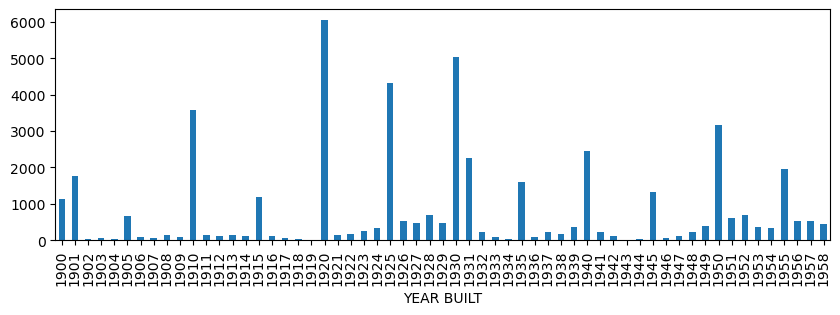

In [25]:
# visualize Group 2
plt.figure(figsize=(10,3))
year_built_cat2.plot(kind='bar')
plt.show()

In [76]:
# normality test data Group 2 use the Shapiro test
array_group2 = np.array(year_built_cat2)

stat, p = shapiro(array_group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.622, p=0.000
Probably not Gaussian


**Insight:**
>The normality test showed that both data groups did not fulfill the assumption of a normal/gaussian distribution with a p value that was not greater than the 5% significance level.

## **Correlation Tests**

In [73]:
# Use the Pearson's Correlation
stat, p = pearsonr(array_group1, array_group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.031, p=0.817
Probably independent


In [28]:
# Use the Spearman's Rank Correlation
stat, p = spearmanr(array_group1, array_group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.053, p=0.690
Probably independent


In [29]:
# Use the Kendall's Rank Correlation
stat, p = kendalltau(array_group1, array_group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.038, p=0.671
Probably independent


**Interpret the p-value:**
>The Correlation Test shows that the two groups of data tend to be independent with the p-value always greater than the 0.05 significance level. This means that the two data are not correlated with each other in terms of linear correlation.

## **Hypothesis Testing**<br>
The statistical test method used is a non-parametric statistical test, namely the Mann-Whitney U test.
<br><br>
The Mann-Whitney U test is used to compare two independent groups of data and does not rely on the assumption of normal distribution.

In [31]:
array_group1 = np.array(year_built_cat1)
array_group2 = np.array(year_built_cat2)
stat, p = mannwhitneyu(array_group1, array_group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=1944.500, p=0.273
Probably the same distribution


**Interpret the p-value**
> H0 fails to be rejected, meaning that there is no difference in the number of units sold between the two groups of properties based on their year of construction. This is indicated by the p-value that is greater than the alpha criterion (0.05) through the Mann-Whitney U test.

### **Confidence Intervals**<br>
CI is a range of values used to measure the extent to which we are confident that a population parameter is within that range. In this test, CI is calculated using the bootstrap method. 
<br><br>
Bootstrap CI is suitable for data that is not normally distributed or data that has characteristics that do not meet the assumption of normality.

In [32]:
array_group1 = np.array(year_built_cat1)
array_group2 = np.array(year_built_cat2)

# Jumlah bootstrap
n_bootstrap = 10000

# List untuk menyimpan perbedaan mean
bootstrap_diff_means = []

# Proses bootstrap
for i in range(n_bootstrap):
    # Resampling dengan penggantian
    sample1 = np.random.choice(array_group1, size=len(array_group1), replace=True)
    sample2 = np.random.choice(array_group2, size=len(array_group2), replace=True)
    
    # Perhitungan mean dan perbedaan mean
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    diff_mean = mean1 - mean2
    
    # Menyimpan perbedaan mean
    bootstrap_diff_means.append(diff_mean)
    
# Menghitung Confidence Interval
ci_lower = np.percentile(bootstrap_diff_means, 2.5)
ci_upper = np.percentile(bootstrap_diff_means, 97.5)

print(f'95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})')

95% Confidence Interval: (-667.12, 23.40)


**Insight:**
>The CI spans zero (in this case, -667.12 to 23.40), indicating that there is no significant difference between the two groups of sold properties. This reinforces that H0 fails to be rejected, meaning that there is no difference in the number of units sold between the two groups of properties divided by year of construction.